In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

In [11]:
#load data
file_path = os.path.join(os.environ.get('rawdir'),'waom10','ocean_avg_0009.nc')
tides10 = xr.open_dataset(file_path)

file_path = os.path.join(os.environ.get('rawdir'),'waom10_nt','ocean_avg_0009.nc')
no_tides10 = xr.open_dataset(file_path)

grid_path = os.path.join(os.environ.get('rawdir'),'gdata','waom_frc','waom10_grd.nc')
grd10 = xr.open_dataset(grid_path)

In [12]:
file_path = os.path.join(os.environ.get('rawdir'),'waom4','ocean_avg_0009.nc')
tides4 = xr.open_dataset(file_path)

file_path = os.path.join(os.environ.get('rawdir'),'waom4_nt','ocean_avg_0009.nc')
no_tides4 = xr.open_dataset(file_path)

grid_path = os.path.join(os.environ.get('rawdir'),'gdata','waom_frc','waom4_grd.nc')
grd4 = xr.open_dataset(grid_path)

In [13]:
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"eta_max,xi_max = find_etaxi(lat_max,lon_max,grd)
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_dir)

from features.massloss import plot_ismr_map,calc_circum

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
ism10 = (grd10.zice < 0.0)&(grd10.mask_rho==1)
ism10.values[200:300,400:500] = False
ism4 = (grd4.zice < 0.0)&(grd4.mask_rho==1)
ism4.values[500:650,1000:1200] = False

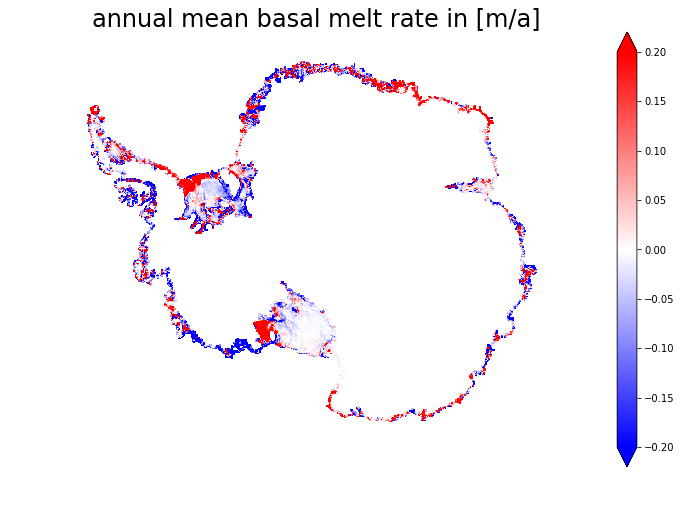

Area of all ice shelves in 10^3 km^2:  1908.84168511
Area average melt rate in m/yr:  0.0446597012364258
Basal mass loss in Gt/a:  87.37950684886871


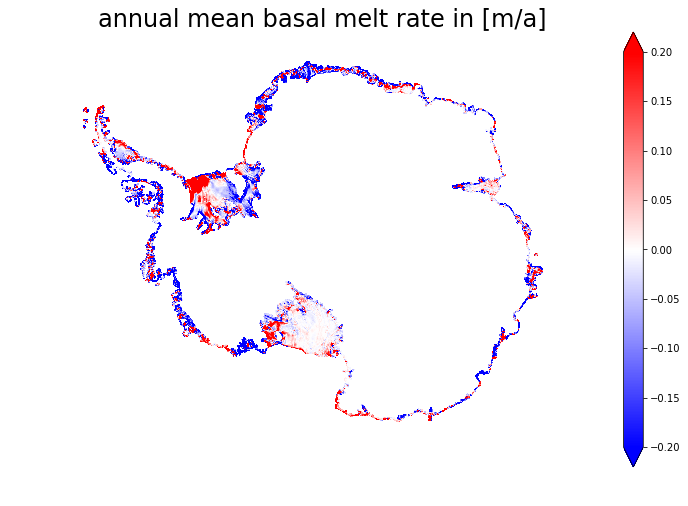

Area of all ice shelves in 10^3 km^2:  1690.84254441
Area average melt rate in m/yr:  0.036556470499414136
Basal mass loss in Gt/a:  63.35651648379035


In [15]:
plot_ismr_map(tides10.m-no_tides10.m,ism10,-0.2,0.2,grd10)
calc_circum(tides10.m-no_tides10.m,ism10,grd10)
plot_ismr_map(tides4.m-no_tides4.m,ism4,-0.2,0.2,grd4)
calc_circum(tides4.m-no_tides4.m,ism4,grd4)

In [22]:
s2a = 24*3600*365
TM10 = xr.Dataset({"TM10":(tides10.m-no_tides10.m).where(ism10).mean('ocean_time')*s2a,"lat10":grd10.lat_rho,"lon10":grd10.lon_rho})
TM10.attrs={'name':'tidal melting','units':'m/yr'}
out_path = os.path.join(os.environ.get('projdir'),'data','analysis','processed','waom10_tidal_melt.nc')
TM10.to_netcdf(out_path)

TM4 = xr.Dataset({"TM4":(tides4.m-no_tides4.m).where(ism4).mean('ocean_time')*s2a,"lat4":grd4.lat_rho,"lon4":grd4.lon_rho})
TM4.attrs={'name':'tidal melting','units':'m/yr'}
out_path = os.path.join(os.environ.get('projdir'),'data','analysis','processed','waom4_tidal_melt.nc')
TM4.to_netcdf(out_path)